<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab2/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [1]:
#!pip install pandas
#!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [3]:
# чтение файла
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
# ваш код здесь
sex = df.groupby(['Sex'])
describe = sex['RestingBP'].describe()
describe

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,193.0,132.212435,19.392638,94.0,120.0,130.0,140.0,200.0
M,725.0,132.445517,18.286739,0.0,120.0,130.0,140.0,200.0


P.S. Так как для мужчин минимальный пульс считается равным нулю, то нужно исключить строки со значениями NaN а так же "0", так же одинаковый максимальный пульс. Предположительно это выброс.

In [5]:
des_sex = df.dropna()

des_sex = des_sex[(des_sex.RestingBP > 1) & (des_sex.RestingBP < 200)]
des_sex = des_sex.reset_index(drop=True)

des_sex2 = des_sex.groupby(['Sex'])
describe2 = des_sex2['RestingBP'].describe()

describe2

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,191.0,131.502618,18.197708,94.0,120.0,130.0,140.0,180.0
M,722.0,132.441828,17.286043,80.0,120.0,130.0,140.0,192.0


P.S. После исключения выброса, значения стали более корректными

In [6]:
# (среднее) ваш код здесь
mean = des_sex['RestingBP'].mean()
mean

132.24534501642935

In [7]:
# (медиана) ваш код здесь
median = des_sex['RestingBP'].median()
median

130.0

In [8]:
# (мода) ваш код здесь
mode = df['RestingBP'].mode()
mode

0    120
Name: RestingBP, dtype: int64

In [9]:
# (минимум) ваш код здесь
min = des_sex['RestingBP'].min()
min

80

In [10]:
# (максимум) ваш код здесь
max = des_sex['RestingBP'].max()
max

192

In [11]:
# (стандартное отклонение) Ваш код здесь
std = des_sex['RestingBP'].std()
std

17.474701096643038

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [12]:
# (25% квантиль) ваш код здесь
q1 = des_sex['RestingBP'].quantile(.25)
q1

120.0

In [13]:
# (50% квантиль) ваш код здесь
q2 = des_sex['RestingBP'].quantile(.5)
q2

130.0

In [14]:
# (75% квантиль) ваш код здесь
q3 = des_sex['RestingBP'].quantile(.75)
q3

140.0

In [15]:
# (интерквартильный размах) ваш код здесь
iqr = q3 - q1
iqr

20.0

Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

Для контекста нужно сказать, что это данные по прогнозированию инсульта, который является одной их главных причин смерти.

Исходя из данных, можно сделать следующие выводы:
    1. Число обследованных мужчин больше, чем женщин, что может говорить о повышеному риску сердечно-сосудистых заболеваний среди мужчин;
    2. Средняя частота сердечного ритма у женщин ниже, чем у мужчин однако, у мужчин диапазон минимального и максимального пульса больше.
    3. Стандартное отклонение сильно различается от средних значений, что говорит о большом разбросе частосы сердчных сокращений как у денщин, так и у мужчин.

##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

Text(0, 0.5, 'Частота')

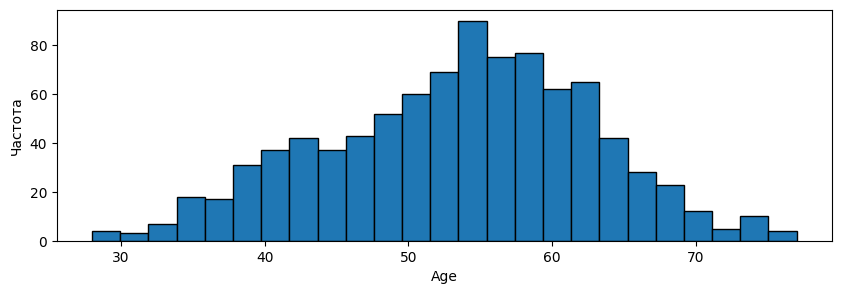

In [16]:
plt.figure(figsize=(10, 3))
plt.hist(des_sex['Age'], bins=25, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Частота')

Обследования проходят в основном люди в возрасте от 45 до 65 лет

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

Text(0.5, 0, 'Age')

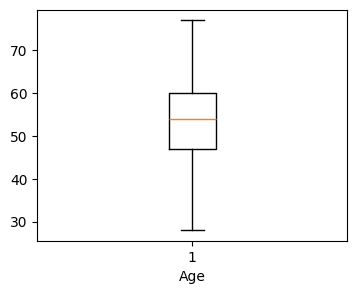

In [17]:
plt.figure(figsize=(4, 3))
plt.boxplot(des_sex['Age'])
plt.xlabel('Age')

<Axes: xlabel='Sex', ylabel='RestingBP'>

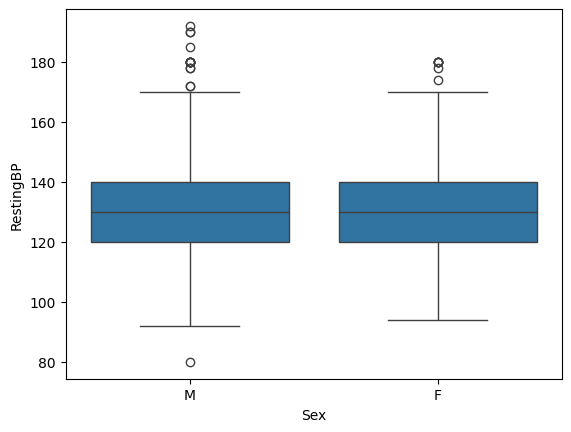

In [18]:
#df2['Age'] = pd.factorize(df2['Age'])[ 0 ]

#df2 = des_sex[['Age', 'RestingBP']]

#plt.figure(figsize=(4, 3))
#plt.boxplot(des_sex['RestingBP'])
#plt.show()

sns.boxplot(x=des_sex['Sex'], y=des_sex['RestingBP'])
#des_sex

Несмотря на найденный ранее выброс, на графике видно аномалии. Однако сложно сказать, что это анималия, так как у каждого человека разная особенность организма и пульс может быть высоким, либо низким, во время обследования

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

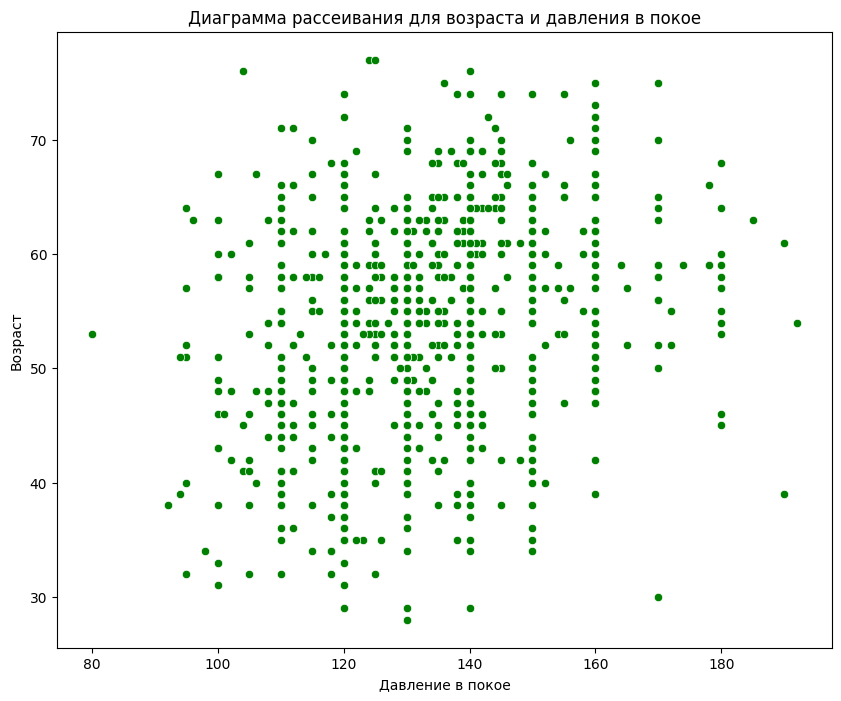

In [19]:
#df2['RestingECG'] = pd.factorize(df2['RestingECG'])[ 0 ]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='RestingBP', y='Age', data=des_sex, color='green')
plt.title('Диаграмма рассеивания для возраста и давления в покое')
plt.xlabel('Давление в покое')
plt.ylabel('Возраст')
plt.show()
#df2

Применяется диаграмма рассеивания пульса к возрасту, так как по отношению к полу, будет очень похожа на boxplot

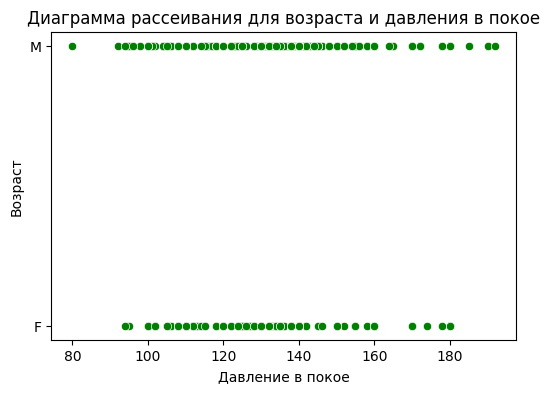

In [20]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RestingBP', y='Sex', data=des_sex, color='green')
plt.title('Диаграмма рассеивания для возраста и давления в покое')
plt.xlabel('Давление в покое')
plt.ylabel('Возраст')
plt.show()

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

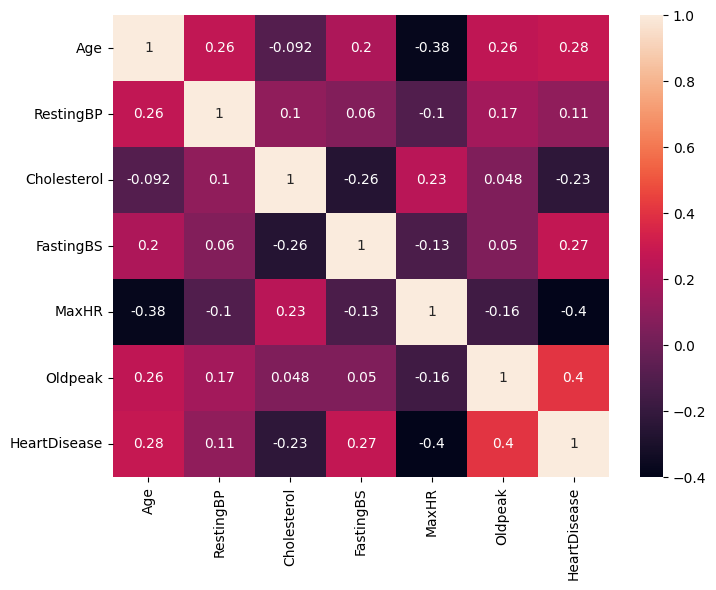

In [21]:
import numpy as np

des_sex = des_sex.select_dtypes(include=np.number)

plt.figure(figsize=(8, 6))
sns.heatmap(des_sex.corr(), annot=True)

Какие выводы можно сделать на основе графиков и матрицы корреляции?

**Ответ здесь**



##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [22]:
class Outline:
  def __init__(self, df):
    self.df = df

  def num1(self, c):
    lst = []

    mean = df[c].mean()
    std =  df[c].std()

    cut_min = mean-std*3
    cut_max = mean+std*3

    for x in df[c]:

      if x >= cut_min and x <= cut_max:
        lst.append(x)

    return print(f'1. Очищенный датафрейм: {lst}')
  
  def num2(self, c):
    import math

    outch = []
    mean = df[c].mean()
    std = df[c].std() 
    n = df[c].count()

    for x in df[c]:

      err_abs, crit = (abs(x-mean))/std, 1/(2*n)

      if math.erfc(err_abs > crit):
        outch.append(x)

    return print(f'2. Очищенный датафрейм: {outch}')
  
  def num3(self, c):
    lst = []

    q1 = df[c].quantile(.25)
    q3 = df[c].quantile(.75)

    min = q1-1.5*(q3-q1)
    max = q3+1.5*(q3-q1)

    for x in df[c]:
      if x >= min and x <= max:
        lst.append(x)

    return print(f'3. Очищенный датафрейм: {lst}')
  
  def num4(self, c):
    #До конта не полял данную задачу
    return 0

In [23]:
so = Outline(df)

so.num1('RestingBP')
so.num2('RestingBP')
so.num3('RestingBP')

1. Очищенный датафрейм: [140, 160, 130, 138, 150, 120, 130, 110, 140, 120, 130, 136, 120, 140, 115, 120, 110, 120, 100, 120, 100, 120, 124, 150, 130, 130, 124, 120, 113, 125, 145, 130, 125, 130, 150, 125, 140, 110, 120, 150, 150, 130, 150, 140, 120, 130, 120, 140, 112, 110, 130, 120, 140, 130, 130, 160, 120, 130, 150, 112, 100, 150, 140, 120, 110, 120, 132, 110, 160, 150, 140, 130, 120, 120, 140, 150, 118, 140, 140, 130, 110, 120, 150, 160, 150, 140, 170, 140, 120, 140, 110, 130, 120, 160, 110, 130, 142, 160, 120, 125, 130, 130, 150, 120, 118, 140, 120, 150, 140, 130, 150, 140, 140, 130, 100, 120, 130, 120, 140, 135, 125, 110, 180, 130, 120, 130, 108, 120, 120, 145, 110, 170, 150, 130, 115, 120, 120, 140, 150, 160, 140, 160, 140, 120, 110, 120, 120, 120, 130, 130, 100, 130, 120, 120, 155, 110, 140, 130, 160, 140, 128, 160, 120, 140, 140, 140, 140, 135, 140, 120, 140, 140, 140, 140, 140, 140, 140, 130, 130, 130, 130, 140, 110, 160, 160, 130, 120, 120, 180, 180, 170, 130, 135, 125, 160, 